In [1]:
# Importing the libraries 

import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline

# Ignore harmless warnings 

import warnings 
warnings.filterwarnings("ignore")

# Set to display all the columns in dataset

pd.set_option("display.max_columns", None)

# Import psql to run queries 

import pandasql as psql

# import datetime class from datetime module

from datetime import datetime

In [2]:
# Load the Bank Marketing Campaign (BMC) data

BMCdata = pd.read_csv(r"D:\00 Datasets\Bank\bank-additional-full-V1.0.csv", header=0)
BMCdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
# Display the dataset information

BMCdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [4]:
# Replace target variable 'Deposit', 'Yes' to 1 and 'No' to 0 and # convert the 'y' to integer value.

BMCdata['Deposit'] = BMCdata['Deposit'].str.replace('yes', '1')
BMCdata['Deposit'] = BMCdata['Deposit'].str.replace('no', '0')
BMCdata['Deposit'] = BMCdata['Deposit'].astype(int)
BMCdata.sample(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
32627,27,entrepreneur,married,university.degree,no,no,yes,cellular,may,mon,117,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1,0
13115,28,technician,divorced,university.degree,no,no,no,cellular,jul,wed,154,1,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
20884,35,technician,single,professional.course,no,yes,no,cellular,aug,thu,238,2,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0
6736,46,blue-collar,married,basic.9y,unknown,no,no,telephone,may,wed,167,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
21475,34,admin.,married,university.degree,no,no,no,cellular,aug,tue,109,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
18799,56,blue-collar,married,basic.6y,unknown,yes,no,cellular,jul,thu,28,21,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
26308,34,management,married,university.degree,no,yes,no,telephone,nov,thu,30,1,999,0,nonexistent,-0.1,93.200,-42.0,4.076,5195.8,0
24780,56,admin.,married,high.school,unknown,yes,no,cellular,nov,tue,105,1,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
9835,36,blue-collar,divorced,high.school,no,yes,no,telephone,jun,wed,133,1,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,0
2145,53,retired,divorced,basic.4y,no,no,no,telephone,may,mon,460,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0


In [5]:
# Count the target or dependent variable by '0' & '1' and 
# their proportion (> 10 : 1, then the dataset is imbalance dataset)

BMCdata_count = BMCdata.Deposit.value_counts()
print('Class 0:', BMCdata_count[0])
print('Class 1:', BMCdata_count[1])
print('Proportion:', round(BMCdata_count[0] / BMCdata_count[1], 2), ': 1')
print('Total CC Trans:', len(BMCdata))

Class 0: 36548
Class 1: 4640
Proportion: 7.88 : 1
Total CC Trans: 41188


In [6]:
# Displaying Duplicate values with in dataset

BMCdata_dup = BMCdata[BMCdata.duplicated(keep='last')]
BMCdata_dup

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,0
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,0
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,0
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,0
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,0
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,0
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0


In [7]:
# Remove the identified duplicate records 

BMCdata = BMCdata.drop_duplicates()
BMCdata.shape

(41176, 21)

In [8]:
# Re-set row index again

BMCdata = BMCdata.reset_index(drop=True)

In [9]:
BMCdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  object 
 2   marital         41176 non-null  object 
 3   education       41176 non-null  object 
 4   default         41176 non-null  object 
 5   housing         41176 non-null  object 
 6   loan            41176 non-null  object 
 7   contact         41176 non-null  object 
 8   month           41176 non-null  object 
 9   day_of_week     41176 non-null  object 
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  object 
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [10]:
# to display all the variables / columns names in dataset

BMCdata.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'Deposit'],
      dtype='object')

In [11]:
# display the unique values count at variable level

for i in BMCdata.columns:
    print(BMCdata[i].value_counts())

31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64
admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64
university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64
no         32577
unknown     8596
yes            3
Name: default, dtype: int64
yes        21571
no         18615
unknown      990
Name: housing, dtype: int64
no         33938
yes   

In [12]:
# Covert the 'Housing' variable to numeric values

BMCdata['housing'].value_counts()

yes        21571
no         18615
unknown      990
Name: housing, dtype: int64

In [13]:
# Replace variable 'housing', and convert the 'housing' to integer value.

BMCdata['housing'] = BMCdata['housing'].str.replace('yes', '1')
BMCdata['housing'] = BMCdata['housing'].str.replace('no', '0')
BMCdata['housing'] = BMCdata['housing'].str.replace('unk0wn', '2')
BMCdata['housing'] = BMCdata['housing'].astype(int)

In [14]:
# Validate the 'housing' variable after conversion

BMCdata['housing'].value_counts(sort=False)

0    18615
1    21571
2      990
Name: housing, dtype: int64

In [15]:
#  Replace variable 'loan', and convert the 'loan' to integer value.

BMCdata['loan'].value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

In [16]:
# Replace variable 'loan', andconvert the 'loan' to integer value.

BMCdata['loan'] = BMCdata['loan'].str.replace('yes', '1')
BMCdata['loan'] = BMCdata['loan'].str.replace('no', '0')
BMCdata['loan'] = BMCdata['loan'].str.replace('unk0wn', '2')
BMCdata['loan'] = BMCdata['loan'].astype(int)

In [17]:
# Validate the 'loan' variable after conversion 

BMCdata['loan'].value_counts(sort=False)

0    33938
1     6248
2      990
Name: loan, dtype: int64

In [18]:
# Replace variable 'job', and convert the 'job' to integer value.

BMCdata['job'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [19]:
# Replace variable 'job', andconvert the 'job' to integer value.

BMCdata['job'] = BMCdata['job'].str.replace('unknown', '0')
BMCdata['job'] = BMCdata['job'].str.replace('student', '0')
BMCdata['job'] = BMCdata['job'].str.replace('unemployed', '0')
BMCdata['job'] = BMCdata['job'].str.replace('housemaid', '1')
BMCdata['job'] = BMCdata['job'].str.replace('self-employed', '2')
BMCdata['job'] = BMCdata['job'].str.replace('retired', '2')
BMCdata['job'] = BMCdata['job'].str.replace('technician', '2')
BMCdata['job'] = BMCdata['job'].str.replace('admin.', '2')
BMCdata['job'] = BMCdata['job'].str.replace('services', '2')
BMCdata['job'] = BMCdata['job'].str.replace('blue-collar', '3')
BMCdata['job'] = BMCdata['job'].str.replace('management', '3')
BMCdata['job'] = BMCdata['job'].str.replace('entrepreneur', '3')
BMCdata['job'] = BMCdata['job'].astype(int)

In [20]:
# Validate the 'job' variable after conversion 

BMCdata['job'].value_counts(sort=False)

1     1060
2    24264
3    13633
0     2219
Name: job, dtype: int64

In [21]:
# Replace variable 'education', andconvert the 'education' to integer value.

BMCdata['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

In [22]:
# Replace the variable 'education', convert the 'education' to integer value.

BMCdata['education'] = BMCdata['education'].str.replace('illiterate', '1')
BMCdata['education'] = BMCdata['education'].str.replace('unknown', '1')
BMCdata['education'] = BMCdata['education'].str.replace('basic.4y', '2')
BMCdata['education'] = BMCdata['education'].str.replace('basic.6y', '2')
BMCdata['education'] = BMCdata['education'].str.replace('basic.9y', '2')
BMCdata['education'] = BMCdata['education'].str.replace('high.school', '3')
BMCdata['education'] = BMCdata['education'].str.replace('professional.course', '4')
BMCdata['education'] = BMCdata['education'].str.replace('university.degree', '5')
BMCdata['education'] = BMCdata['education'].astype(int)

In [23]:
# Validate the 'education' variable after conversion 

BMCdata['education'].value_counts(sort=False)

2    12512
3     9512
4     5240
1     1748
5    12164
Name: education, dtype: int64

In [24]:
# Replace the variable 'education', convert the 'education' to integer value.

BMCdata['marital'].value_counts()

married     24921
single      11564
divorced     4611
unknown        80
Name: marital, dtype: int64

In [25]:
# Replace variable 'marital', and convert the 'marital' to integer value.

BMCdata['marital'] = BMCdata['marital'].str.replace('single', '1')
BMCdata['marital'] = BMCdata['marital'].str.replace('married', '2')
BMCdata['marital'] = BMCdata['marital'].str.replace('divorced', '3')
BMCdata['marital'] = BMCdata['marital'].str.replace('unknown', '4')
BMCdata['marital'] = BMCdata['marital'].astype(int)

In [26]:
BMCdata['marital'].value_counts(sort=False)

2    24921
1    11564
3     4611
4       80
Name: marital, dtype: int64

In [27]:
BMCdata['default'].value_counts()

no         32577
unknown     8596
yes            3
Name: default, dtype: int64

In [28]:
# Replace variable 'default', and convert the 'default' to integer value.

BMCdata['default'] = BMCdata['default'].str.replace('yes', '1')
BMCdata['default'] = BMCdata['default'].str.replace('no', '0')
BMCdata['default'] = BMCdata['default'].str.replace('unk0wn', '2')
BMCdata['default'] = BMCdata['default'].astype(int)

In [29]:
BMCdata['default'].value_counts(sort=False)

0    32577
2     8596
1        3
Name: default, dtype: int64

In [30]:
BMCdata['contact'].value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

In [31]:
# Replace variable 'contact', and convert the 'contact' to integer value.

BMCdata['contact'] = BMCdata['contact'].str.replace('telephone', '1')
BMCdata['contact'] = BMCdata['contact'].str.replace('cellular', '2')
BMCdata['contact'] = BMCdata['contact'].astype(int)

In [32]:
BMCdata['contact'].value_counts(sort=False)

1    15041
2    26135
Name: contact, dtype: int64

In [33]:
BMCdata['day_of_week'].value_counts()

thu    8618
mon    8512
wed    8134
tue    8086
fri    7826
Name: day_of_week, dtype: int64

In [34]:
# Replace variable 'day_of_week', and convert the 'day_of_week' to integer value.

BMCdata['day_of_week'] = BMCdata['day_of_week'].str.replace('mon', '1')
BMCdata['day_of_week'] = BMCdata['day_of_week'].str.replace('tue', '2')
BMCdata['day_of_week'] = BMCdata['day_of_week'].str.replace('wed', '3')
BMCdata['day_of_week'] = BMCdata['day_of_week'].str.replace('thu', '4')
BMCdata['day_of_week'] = BMCdata['day_of_week'].str.replace('fri', '5')
BMCdata['day_of_week'] = BMCdata['day_of_week'].astype(int)

In [35]:
BMCdata['day_of_week'].value_counts(sort=False)

1    8512
2    8086
3    8134
4    8618
5    7826
Name: day_of_week, dtype: int64

In [36]:
BMCdata['month'].value_counts()

may    13767
jul     7169
aug     6176
jun     5318
nov     4100
apr     2631
oct      717
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [37]:
# Replace variable 'month', and convert the 'month' to integer value.

BMCdata['month'] = BMCdata['month'].str.replace('mar', '3')
BMCdata['month'] = BMCdata['month'].str.replace('apr', '4')
BMCdata['month'] = BMCdata['month'].str.replace('may', '5')
BMCdata['month'] = BMCdata['month'].str.replace('jun', '6')
BMCdata['month'] = BMCdata['month'].str.replace('jul', '7')
BMCdata['month'] = BMCdata['month'].str.replace('aug', '8')
BMCdata['month'] = BMCdata['month'].str.replace('sep', '9')
BMCdata['month'] = BMCdata['month'].str.replace('oct', '10')
BMCdata['month'] = BMCdata['month'].str.replace('nov', '11')
BMCdata['month'] = BMCdata['month'].str.replace('dec', '12')
BMCdata['month'] = BMCdata['month'].astype(int)

In [38]:
BMCdata['month'].value_counts(sort=False)

5     13767
6      5318
7      7169
8      6176
10      717
11     4100
12      182
3       546
4      2631
9       570
Name: month, dtype: int64

In [39]:
BMCdata['poutcome'].value_counts()

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

In [40]:
# Replace variable 'poutcome', and convert the 'poutcome' to integer value.

BMCdata['poutcome'] = BMCdata['poutcome'].str.replace('nonexistent', '0')
BMCdata['poutcome'] = BMCdata['poutcome'].str.replace('failure', '1')
BMCdata['poutcome'] = BMCdata['poutcome'].str.replace('success', '2')
BMCdata['poutcome'] = BMCdata['poutcome'].astype(int)

In [41]:
BMCdata['poutcome'].value_counts(sort=False)

0    35551
1     4252
2     1373
Name: poutcome, dtype: int64

In [42]:
BMCdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41176 entries, 0 to 41175
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41176 non-null  int64  
 1   job             41176 non-null  int32  
 2   marital         41176 non-null  int32  
 3   education       41176 non-null  int32  
 4   default         41176 non-null  int32  
 5   housing         41176 non-null  int32  
 6   loan            41176 non-null  int32  
 7   contact         41176 non-null  int32  
 8   month           41176 non-null  int32  
 9   day_of_week     41176 non-null  int32  
 10  duration        41176 non-null  int64  
 11  campaign        41176 non-null  int64  
 12  pdays           41176 non-null  int64  
 13  previous        41176 non-null  int64  
 14  poutcome        41176 non-null  int32  
 15  emp.var.rate    41176 non-null  float64
 16  cons.price.idx  41176 non-null  float64
 17  cons.conf.idx   41176 non-null 

In [43]:
# Settings to display all columns of dataset

pd.set_option("display.max_columns", None)

# Settings to display all rows of dataset

#pd.set_option("max_rows", None) # Please do not run this command

# Display the dataframe head

BMCdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
0,56,1,2,2,0,0,0,1,5,1,261,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2,2,3,2,0,0,1,5,1,149,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2,2,3,0,1,0,1,5,1,226,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
3,40,2,2,2,0,0,0,1,5,1,151,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0
4,56,2,2,3,0,0,1,1,5,1,307,1,999,0,0,1.1,93.994,-36.4,4.857,5191.0,0


In [44]:
BMCdata.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41176.0,40.023800,10.420680,17.000,32.000,38.000,47.000,98.000
job,41176.0,2.197567,0.730327,0.000,2.000,2.000,3.000,3.000
marital,41176.0,1.835025,0.611056,1.000,1.000,2.000,2.000,4.000
education,41176.0,3.329318,1.293902,1.000,2.000,3.000,5.000,5.000
default,41176.0,0.417598,0.812866,0.000,0.000,0.000,0.000,2.000
housing,41176.0,0.571959,0.541216,0.000,0.000,1.000,1.000,2.000
loan,41176.0,0.199825,0.456055,0.000,0.000,0.000,0.000,2.000
contact,41176.0,1.634714,0.481516,1.000,1.000,2.000,2.000,2.000
month,41176.0,6.607733,2.041013,3.000,5.000,6.000,8.000,12.000
day_of_week,41176.0,2.979600,1.411539,1.000,2.000,3.000,4.000,5.000


In [45]:
BMCdata.corr()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,Deposit
age,1.000000,0.066493,0.388763,-0.120075,0.164993,-0.001807,-0.006387,-0.006917,0.077098,-0.018443,-0.000808,0.004622,-0.034381,0.024379,0.026386,-0.000242,0.001009,0.129075,0.010852,-0.017607,0.030381
job,0.066493,1.000000,0.108248,-0.138296,0.075309,-0.012159,-0.003542,-0.060388,-0.069358,0.003203,0.007118,0.003473,0.093313,-0.073935,-0.075114,0.080987,0.050949,-0.092908,0.083156,0.108888,-0.088821
marital,0.388763,0.108248,1.000000,-0.096696,0.076899,-0.010992,-0.003973,-0.053601,0.016987,-0.014461,-0.007573,0.010008,0.036095,-0.035952,-0.037016,0.081391,0.054933,0.032830,0.089297,0.084133,-0.044585
education,-0.120075,-0.138296,-0.096696,1.000000,-0.203771,0.015302,0.006518,0.119410,0.139336,-0.004008,-0.016510,0.000072,-0.035668,0.024192,0.029173,-0.041404,-0.100733,0.072666,-0.031670,-0.029190,0.047865
default,0.164993,0.075309,0.076899,-0.203771,1.000000,-0.010922,0.001049,-0.135572,-0.084713,-0.004026,-0.011652,0.032951,0.080089,-0.102616,-0.108375,0.203257,0.168290,0.026379,0.195303,0.189789,-0.099336
housing,-0.001807,-0.012159,-0.010992,0.015302,-0.010922,1.000000,0.289769,0.065314,0.024103,-0.007171,-0.009085,-0.010255,-0.008726,0.020975,0.021406,-0.053505,-0.066408,-0.027568,-0.052744,-0.042307,0.009605
loan,-0.006387,-0.003542,-0.003973,0.006518,0.001049,0.289769,1.000000,-0.004361,-0.009274,0.003201,-0.003246,0.003854,0.001323,0.000801,-0.000628,0.003046,0.006274,-0.005871,0.001547,0.002470,-0.005051
contact,-0.006917,-0.060388,-0.053601,0.119410,-0.135572,0.065314,-0.004361,1.000000,0.324394,-0.019540,0.026665,-0.077387,-0.117999,0.212903,0.226872,-0.393730,-0.591596,-0.251575,-0.399892,-0.269285,0.144774
month,0.077098,-0.069358,0.016987,0.139336,-0.084713,0.024103,-0.009274,0.324394,1.000000,-0.006849,-0.019246,-0.030598,-0.079583,0.063792,0.060881,0.058907,-0.150309,0.264139,0.163425,0.132719,0.037210
day_of_week,-0.018443,0.003203,-0.014461,-0.004008,-0.004026,-0.007171,0.003201,-0.019540,-0.006849,1.000000,0.010527,0.015061,0.006769,0.004009,0.003275,-0.004371,-0.004607,-0.000021,-0.005513,-0.000702,0.009993


In [46]:
# Identify the independent and Target variables

IndepVar = []
for col in BMCdata.columns:
    if col != 'Deposit':
        IndepVar.append(col)

TargetVar = 'Deposit'

x = BMCdata[IndepVar]
y = BMCdata[TargetVar]

In [74]:
# Random oversampling can be implemented using the RandomOverSampler class

from imblearn.over_sampling import RandomOverSampler

oversample = RandomOverSampler(sampling_strategy=0.127)

x_over, y_over = oversample.fit_resample(x, y)

print(x_over.shape)
print(y_over.shape)

(41177, 20)
(41177,)


In [61]:
y_over.value_counts()

0    36537
1    10961
Name: Deposit, dtype: int64

In [47]:
y.value_counts()

0    36537
1     4639
Name: Deposit, dtype: int64

In [62]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size = 0.20, random_state = 42)

In [48]:
# Splitting the dataset into train and test 

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [63]:
# Scaling the features by using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler

mmscaler = MinMaxScaler(feature_range=(0, 1))

x_train = mmscaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train)

x_test = mmscaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test)

In [50]:
# Load the result dataset

CSResults = pd.read_csv(r"D:\000 DataScience\01-Internship\CSResults.csv", header=0)
CSResults.head()

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy


# Classification models with over sampling & compare the results

Model Name:  LogisticRegression()
Confusion matrix : 
 [[1654  533]
 [ 665 6648]]
Outcome values : 
 1654 533 665 6648
Classification report : 
               precision    recall  f1-score   support

           1       0.71      0.76      0.73      2187
           0       0.93      0.91      0.92      7313

    accuracy                           0.87      9500
   macro avg       0.82      0.83      0.83      9500
weighted avg       0.88      0.87      0.88      9500

Accuracy : 87.4 %
Precision : 71.3 %
Recall : 75.6 %
F1 Score : 0.734
Specificity or True Negative Rate : 90.9 %
Balanced Accuracy : 83.2 %
MCC : 0.652
roc_auc_score: 0.833


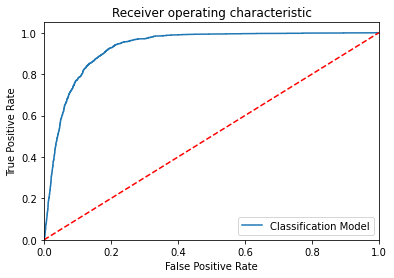

-----------------------------------------------------------------------------------------------------
Model Name:  DecisionTreeClassifier()
Confusion matrix : 
 [[1432  755]
 [ 736 6577]]
Outcome values : 
 1432 755 736 6577
Classification report : 
               precision    recall  f1-score   support

           1       0.66      0.65      0.66      2187
           0       0.90      0.90      0.90      7313

    accuracy                           0.84      9500
   macro avg       0.78      0.78      0.78      9500
weighted avg       0.84      0.84      0.84      9500

Accuracy : 84.3 %
Precision : 66.1 %
Recall : 65.5 %
F1 Score : 0.658
Specificity or True Negative Rate : 89.9 %
Balanced Accuracy : 77.7 %
MCC : 0.556
roc_auc_score: 0.777


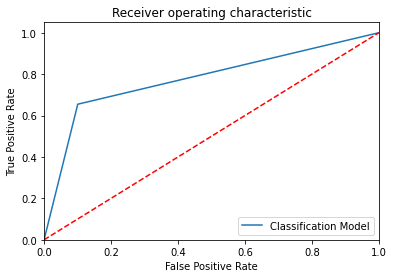

-----------------------------------------------------------------------------------------------------
Model Name:  RandomForestClassifier()
Confusion matrix : 
 [[1974  213]
 [ 620 6693]]
Outcome values : 
 1974 213 620 6693
Classification report : 
               precision    recall  f1-score   support

           1       0.76      0.90      0.83      2187
           0       0.97      0.92      0.94      7313

    accuracy                           0.91      9500
   macro avg       0.87      0.91      0.88      9500
weighted avg       0.92      0.91      0.91      9500

Accuracy : 91.2 %
Precision : 76.1 %
Recall : 90.3 %
F1 Score : 0.826
Specificity or True Negative Rate : 91.5 %
Balanced Accuracy : 90.9 %
MCC : 0.773
roc_auc_score: 0.909


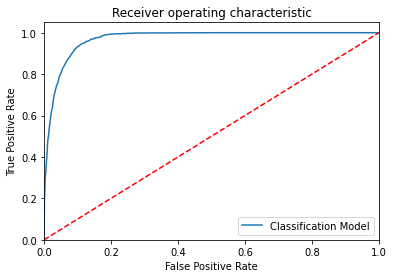

-----------------------------------------------------------------------------------------------------
Model Name:  ExtraTreesClassifier()
Confusion matrix : 
 [[2000  187]
 [ 388 6925]]
Outcome values : 
 2000 187 388 6925
Classification report : 
               precision    recall  f1-score   support

           1       0.84      0.91      0.87      2187
           0       0.97      0.95      0.96      7313

    accuracy                           0.94      9500
   macro avg       0.91      0.93      0.92      9500
weighted avg       0.94      0.94      0.94      9500

Accuracy : 93.9 %
Precision : 83.8 %
Recall : 91.4 %
F1 Score : 0.874
Specificity or True Negative Rate : 94.7 %
Balanced Accuracy : 93.0 %
MCC : 0.836
roc_auc_score: 0.931


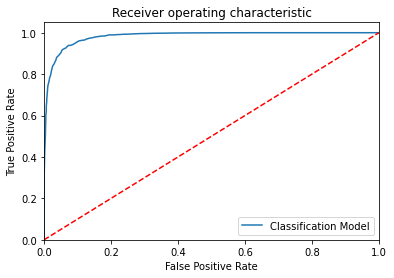

-----------------------------------------------------------------------------------------------------
Model Name:  KNeighborsClassifier()
Confusion matrix : 
 [[1507  680]
 [ 673 6640]]
Outcome values : 
 1507 680 673 6640
Classification report : 
               precision    recall  f1-score   support

           1       0.69      0.69      0.69      2187
           0       0.91      0.91      0.91      7313

    accuracy                           0.86      9500
   macro avg       0.80      0.80      0.80      9500
weighted avg       0.86      0.86      0.86      9500

Accuracy : 85.8 %
Precision : 69.1 %
Recall : 68.9 %
F1 Score : 0.69
Specificity or True Negative Rate : 90.8 %
Balanced Accuracy : 79.8 %
MCC : 0.598
roc_auc_score: 0.799


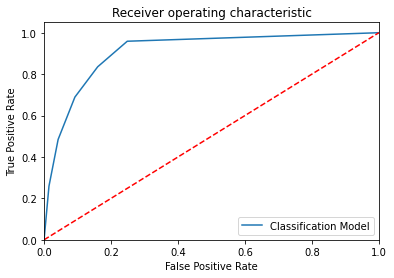

-----------------------------------------------------------------------------------------------------
Model Name:  GradientBoostingClassifier()
Confusion matrix : 
 [[1938  249]
 [ 915 6398]]
Outcome values : 
 1938 249 915 6398
Classification report : 
               precision    recall  f1-score   support

           1       0.68      0.89      0.77      2187
           0       0.96      0.87      0.92      7313

    accuracy                           0.88      9500
   macro avg       0.82      0.88      0.84      9500
weighted avg       0.90      0.88      0.88      9500

Accuracy : 87.7 %
Precision : 67.9 %
Recall : 88.6 %
F1 Score : 0.769
Specificity or True Negative Rate : 87.5 %
Balanced Accuracy : 88.1 %
MCC : 0.699
roc_auc_score: 0.881


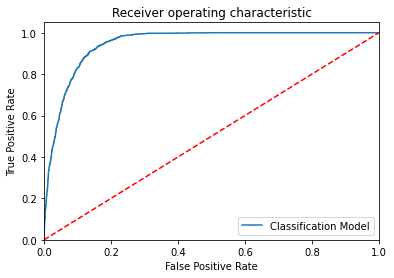

-----------------------------------------------------------------------------------------------------


In [64]:
# Build the Calssification models and compare the results

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

# Create objects of classification algorithm with default hyper-parameters

ModelLR = LogisticRegression()
ModelDC = DecisionTreeClassifier()
ModelRF = RandomForestClassifier()
ModelET = ExtraTreesClassifier()
ModelKNN = KNeighborsClassifier(n_neighbors=5)
ModelGB = GradientBoostingClassifier()

# Evalution matrix for all the algorithms

MM = [ModelLR, ModelDC, ModelRF, ModelET, ModelKNN, ModelGB]
for models in MM:
    
    # Fit the model
    
    models.fit(x_train, y_train)
    
    # Prediction
    
    y_pred = models.predict(x_test)
    y_pred_prob = models.predict_proba(x_test)
    
    # Print the model name
    
    print('Model Name: ', models)
    
    # confusion matrix in sklearn

    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report

    # actual values

    actual = y_test

    # predicted values

    predicted = y_pred

    # confusion matrix

    matrix = confusion_matrix(actual,predicted, labels=[1,0],sample_weight=None, normalize=None)
    print('Confusion matrix : \n', matrix)

    # outcome values order in sklearn

    tp, fn, fp, tn = confusion_matrix(actual,predicted,labels=[1,0]).reshape(-1)
    print('Outcome values : \n', tp, fn, fp, tn)

    # classification report for precision, recall f1-score and accuracy

    C_Report = classification_report(actual,predicted,labels=[1,0])

    print('Classification report : \n', C_Report)

    # calculating the metrics

    sensitivity = round(tp/(tp+fn), 3);
    specificity = round(tn/(tn+fp), 3);
    accuracy = round((tp+tn)/(tp+fp+tn+fn), 3);
    balanced_accuracy = round((sensitivity+specificity)/2, 3);
    
    precision = round(tp/(tp+fp), 3);
    f1Score = round((2*tp/(2*tp + fp + fn)), 3);

    # Matthews Correlation Coefficient (MCC). Range of values of MCC lie between -1 to +1. 
    # A model with a score of +1 is a perfect model and -1 is a poor model

    from math import sqrt

    mx = (tp+fp) * (tp+fn) * (tn+fp) * (tn+fn)
    MCC = round(((tp * tn) - (fp * fn)) / sqrt(mx), 3)

    print('Accuracy :', round(accuracy*100, 2),'%')
    print('Precision :', round(precision*100, 2),'%')
    print('Recall :', round(sensitivity*100,2), '%')
    print('F1 Score :', f1Score)
    print('Specificity or True Negative Rate :', round(specificity*100,2), '%'  )
    print('Balanced Accuracy :', round(balanced_accuracy*100, 2),'%')
    print('MCC :', MCC)

    # Area under ROC curve 

    from sklearn.metrics import roc_curve, roc_auc_score

    print('roc_auc_score:', round(roc_auc_score(y_test, y_pred), 3))
    
    # ROC Curve
    
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, y_pred)
    fpr, tpr, thresholds = roc_curve(y_test, models.predict_proba(x_test)[:,1])
    plt.figure()
    # plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot(fpr, tpr, label= 'Classification Model' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    plt.savefig('Log_ROC')
    plt.show()
    #-------------------------------------------------------------------------------------
    new_row = {'Model Name' : models,
               'Accuracy' : accuracy,
               'Precision' : precision,
               'Recall' : sensitivity,
               'F1 Score' : f1Score,
               'Specificity' : specificity,
               'MCC':MCC,
               'ROC_AUC_Score':roc_auc_score(y_test, y_pred),
               'Balanced Accuracy':balanced_accuracy}
    CSResults = CSResults.append(new_row, ignore_index=True)
    #-------------------------------------------------------------------------------------
    print('-----------------------------------------------------------------------------------------------------')

In [67]:
# Results with comparing the all the algorithms 

#CSResults.to_csv("D://000 DataScience//01-Internship//CSResults_11.csv")

CSResults.head(30)

,Model Name,Accuracy,Precision,Recall,F1 Score,Specificity,MCC,ROC_AUC_Score,Balanced Accuracy
0,LogisticRegression(),0.906,0.634,0.484,0.549,0.963,0.503,0.723367,0.724
1,DecisionTreeClassifier(),0.861,0.430,0.554,0.484,0.902,0.410,0.727963,0.728
2,"(DecisionTreeClassifier(max_features='auto', r...",0.903,0.587,0.611,0.599,0.943,0.544,0.776656,0.777
3,"(ExtraTreeClassifier(random_state=894998767), ...",0.900,0.596,0.478,0.531,0.957,0.479,0.717318,0.718
4,KNeighborsClassifier(),0.892,0.586,0.290,0.388,0.973,0.362,0.631515,0.632
5,([DecisionTreeRegressor(criterion='friedman_ms...,0.910,0.607,0.663,0.634,0.943,0.583,0.802918,0.803
6,LogisticRegression(),0.886,0.646,0.713,0.678,0.921,0.610,0.817149,0.817
7,DecisionTreeClassifier(),0.842,0.525,0.663,0.586,0.879,0.495,0.770626,0.771
8,"(DecisionTreeClassifier(max_features='auto', r...",0.895,0.643,0.846,0.731,0.905,0.677,0.875523,0.876
9,"(ExtraTreeClassifier(random_state=1995513806),...",0.918,0.732,0.808,0.768,0.940,0.720,0.873902,0.874
